In [4]:
import pandas as pd

# Load data
file_path = 'SampleData.csv'
df = pd.read_csv(file_path)

# Drop rows with missing target values
df = df.dropna(subset=['StatusFlag'])

# Encode the target: 'Kill' is negative (0) and any other status is positive (1)
df['Target'] = df['StatusFlag'].apply(lambda x: 0 if x == 'Kill' else 1)

# Select non-text intensive (mostly numeric) features
numeric_cols = ['AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc']
cols_to_keep = ['UID'] + numeric_cols + ['Target']
df_numeric = df[cols_to_keep].copy()

# Create missingness indicators for each numeric column
for col in numeric_cols:
    df_numeric[f'{col}_missing'] = df_numeric[col].isnull().astype(int)

# Note: We are NOT imputing missing values here. They remain as NaN.
# This allows the model to learn that these values are unknown.
print(df_numeric.head())
print("\nSummary statistics:")
print(df_numeric.describe(include='all'))


      UID  AskingPrice    Revenue  CashFlow_Calc  Margin_Calc  Multiple_Calc  \
0  527283          0.0  6950000.0      2430000.0     0.349640       0.000000   
1  529448          0.0  2862355.0      1252063.0     0.437424       0.000000   
2  594439          0.0  3604884.0      2428436.0     0.673652       0.000000   
3  598254   12000000.0  2300000.0      1100000.0     0.478261      10.909091   
4  614266   22350000.0  8088000.0      2489000.0     0.307740       8.979510   

   Target  AskingPrice_missing  Revenue_missing  CashFlow_Calc_missing  \
0       1                    0                0                      0   
1       1                    0                0                      0   
2       1                    0                0                      0   
3       1                    0                0                      0   
4       1                    0                0                      0   

   Margin_Calc_missing  Multiple_Calc_missing  
0                    0    

Dataset Shape: (5419, 52)
Columns: ['UID', 'StatusFlag', 'ViewState', 'CreateTime', 'SourceSite', 'ScrapeTime', 'ListingNumber', 'Title_URL', 'Title', 'Tagline', 'Industry', 'AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc', 'CashFlow', 'EBITDA', 'NetProfit', 'DownPayment', 'Location', 'Location2', 'LongDescription', 'AdditionalDetails', 'YearEstablished', 'Inventory', 'FFE', 'RealEstate', 'RealEstateType', 'Facilities', 'BuildingSQFt', 'Employees', 'ReasonForSelling', 'SICCode', 'LinktoNDA', 'Website', 'MarketOutlook', 'GrowthNdExpansion', 'Training', 'SellerFinancing', 'Ad_Detail_Views', 'Attachment_1', 'Attachment_2', 'Attachment_3', 'Attachment_4', 'Attachment_5', 'BrokerName', 'BrokerEmail', 'BrokerNumber', 'FirmName', 'BrokerHrefLink', 'Original_URL']


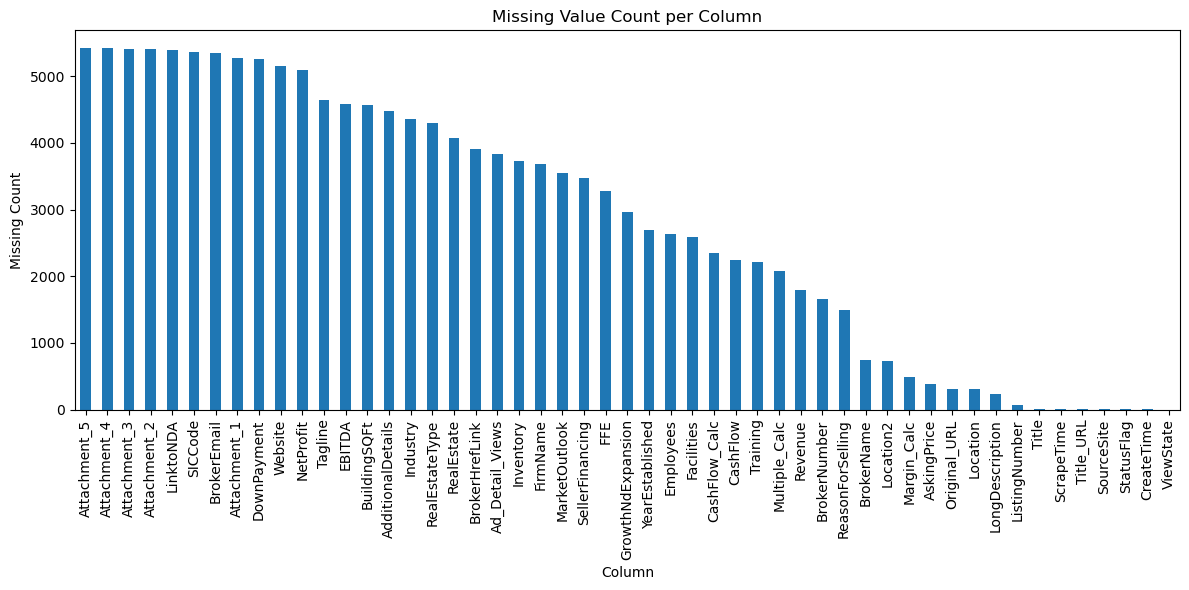


Descriptive Statistics for Numeric Columns:
        AskingPrice       Revenue  CashFlow_Calc  Margin_Calc  Multiple_Calc  \
count  5.030000e+03  3.624000e+03   3.072000e+03  4930.000000    3334.000000   
mean   1.042202e+06  1.793632e+06   4.731811e+05     0.261553     227.081028   
std    3.174819e+06  4.581926e+06   1.053778e+06     5.701029    9038.948310   
min    0.000000e+00  0.000000e+00   1.000000e+00     0.000000       0.000000   
25%    1.350000e+05  3.339690e+05   9.921750e+04     0.000000       1.250000   
50%    2.600000e+05  7.589570e+05   1.982375e+05     0.135755       2.449562   
75%    7.750000e+05  1.712018e+06   4.313922e+05     0.278867       3.667294   
max    1.490000e+08  1.500000e+08   2.600000e+07   400.000000  495000.000000   

          NetProfit   DownPayment       SICCode  Attachment_4  Attachment_5  
count  3.270000e+02  1.580000e+02  5.400000e+01           0.0           0.0  
mean   8.564024e+05  1.309278e+06  2.392068e+06           NaN           NaN  


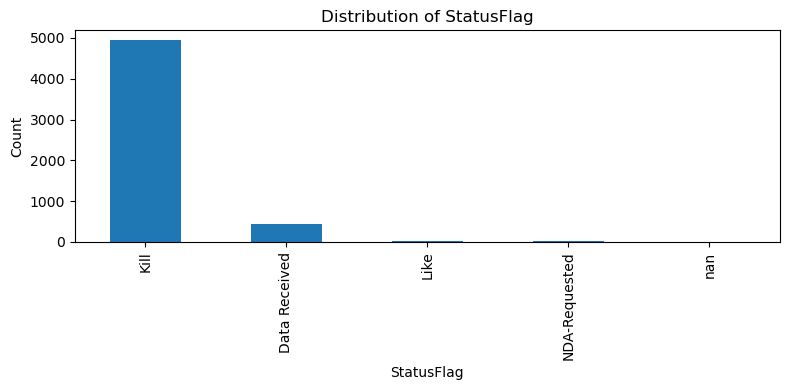


First 5 rows of the dataset:
      UID     StatusFlag ViewState CreateTime          SourceSite ScrapeTime  \
0  527283  Data Received    Hidden    28:59.9  BusinessBroker.Net    43:13.1   
1  529448  Data Received    Hidden    28:45.1  BusinessBroker.Net    39:28.3   
2  594439  Data Received    Hidden    21:45.3  BusinessBroker.Net    26:57.9   
3  598254  Data Received    Hidden    20:48.0  BusinessBroker.Net    45:01.7   
4  614266  Data Received    Hidden    05:20.0  BusinessBroker.Net    29:52.6   

  ListingNumber                                          Title_URL  \
0        527283  https://www.businessbroker.net/business-for-sa...   
1        529448  https://www.businessbroker.net/business-for-sa...   
2        594439  https://www.businessbroker.net/business-for-sa...   
3        598254  https://www.businessbroker.net/business-for-sa...   
4        614266  https://www.businessbroker.net/business-for-sa...   

                                               Title Tagline  ...  \

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'SampleData.csv'
df = pd.read_csv(file_path)

# Print basic information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Calculate and visualize missing values for each column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing_counts.plot(kind='bar')
plt.title("Missing Value Count per Column")
plt.xlabel("Column")
plt.ylabel("Missing Count")
plt.tight_layout()
plt.show()

# Display descriptive statistics for numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("\nDescriptive Statistics for Numeric Columns:")
print(df[numeric_cols].describe())

# Visualize the distribution of the target variable (StatusFlag)
print("\nStatusFlag Value Counts (including missing):")
print(df['StatusFlag'].value_counts(dropna=False))

plt.figure(figsize=(8,4))
df['StatusFlag'].value_counts(dropna=False).plot(kind='bar')
plt.title("Distribution of StatusFlag")
plt.xlabel("StatusFlag")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Display a preview of the dataset (first 5 rows)
print("\nFirst 5 rows of the dataset:")
print(df.head())


In [1]:
import pandas as pd

# Load the dataset
file_path = 'SampleData.csv'
df = pd.read_csv(file_path)

# Drop rows where StatusFlag is missing (we need this for our target)
df = df.dropna(subset=['StatusFlag'])

# Create a new binary target column: 0 if "Kill", 1 for all other statuses
df['Target'] = df['StatusFlag'].apply(lambda x: 0 if x == 'Kill' else 1)

# Define key numeric columns for which we'll create missingness indicators
numeric_cols = ['AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc']

# Create a missingness indicator for each numeric column
for col in numeric_cols:
    df[f'{col}_missing'] = df[col].isnull().astype(int)

# Optionally, you could also keep missing textual values as-is or replace them with a placeholder
# For example, to replace missing text with 'Missing', you might do:
# text_cols = ['Title', 'Tagline', 'Industry', 'LongDescription', 'AdditionalDetails', ... ]
# df[text_cols] = df[text_cols].fillna('Missing')

# Output the new CSV file for training
output_file = 'training_data.csv'
df.to_csv(output_file, index=False)
print("New CSV for training saved as:", output_file)


New CSV for training saved as: training_data.csv
